In [1]:
from DataPreProc import *
from RegistwStats import *
from LookFiles import *
import csv
from similarityMetrics_fun import *
import matplotlib.pyplot as plt

C:\Users\delaoArevaLR\AppData\Local\anaconda3\envs\Ch2_July23_2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root_path = "//zkh/appdata/RTDicom/Projectline_modelling_lung_cancer/Users/Luis/CT_RT_PET_ACCT_NiiToHabrok/"
Px = str(9936840)
root_MiradaRegist = "//zkh/appdata/RTDicom/Projectline_modelling_lung_cancer/Users/Luis/RRegistered_ACCTs_Nii/"

In [3]:

acct_Path, acct_PathLM, PET_Path, planct_path, planct_pathLM, ITV_Path = LookFiles(os.path.join(root_path,Px))

ACCT 1 ACCT_LM 1 PET 1 PlanCT 1 PlanCT_LM 1 ITV 1


In [4]:
print(Px,"PlanCT")
DataPreProc(planct_path, planct_pathLM,ITV_Path, os.path.join(root_path, Px),"PlanCT")

9936840 PlanCT
Init Sizes: (512, 512, 119) (512, 512, 119) (512, 512, 119)
Cropped: (384, 301, 119) (384, 301, 119) (384, 301, 119)
Normalized Sizes: (174, 136, 59) (174, 136, 59) (174, 136, 59)


0

# *SimpleITK REGISTRATION*

In [5]:
print(Px, "ACCT")
DataPreProc(acct_Path, acct_PathLM, PET_Path, os.path.join(root_path, Px), "ACCT")

9936840 ACCT
Init Sizes: (512, 512, 489) (512, 512, 489) (256, 256, 488)
Itnerpolate Add Img before Cropping
Cropped: (239, 179, 179) (239, 179, 179) (239, 179, 179)
Normalized Sizes: (182, 136, 89) (182, 136, 89) (182, 136, 89)


0

In [6]:
SingPxRegistWMetrics(root_path,Px)

ACCTr img 1 ACCTr LM 1
CTCT Axial: 1.15, 0.40, 393440069.33
CTCT Coronal 1.17, 0.50, 443630137.90
CTCT Sagital 1.14, 0.44, 2081442288.00
LMLM Axial 1.14, 0.34, 376579387.73
LMLM Coronal 1.16, 0.50, 437565955.05
LMLM Sagital 1.13, 0.40, 2037443968.00


0

# *MIRADA Registration*

In [14]:

acct_Path = [os.path.join(root_MiradaRegist,Px,"rregist001_fast.nii.gz")]
acct_PathLM = []
PET_Path = [os.path.join(root_MiradaRegist,Px,"pet_ar_9936840.nii.gz")]
DataPreProc(acct_Path, acct_PathLM, PET_Path, os.path.join(root_MiradaRegist, Px), "ACCT")

(119, 512, 512)


101%|██████████| 6/5.95 [00:01<00:00,  3.43it/s]

lungmask 2024-01-29 13:39:01 Postprocessing



100%|██████████| 10/10 [00:00<00:00, 92.65it/s]


Init Sizes: (512, 512, 119) (512, 512, 119) (512, 512, 119)
Cropped: (395, 302, 119) (395, 302, 119) (395, 302, 119)
Normalized Sizes: (178, 136, 59) (178, 136, 59) (178, 136, 59)


0

In [15]:
acctLM_img =sitk.ReadImage(os.path.join(root_MiradaRegist,Px,"ACCT_image_resampled3.nii.gz"))
img1_np = sitk.GetArrayViewFromImage(acctLM_img)

PlanCT_img =sitk.ReadImage(os.path.join(root_path,Px,"PlanCT_image_resampled3.nii.gz"))
img2_np = sitk.GetArrayViewFromImage(PlanCT_img)
ITV_img =sitk.ReadImage(os.path.join(root_path,Px,"PlanCT_ITV_resampled3.nii.gz"))
itv_np =  sitk.GetArrayViewFromImage(ITV_img)

print(img1_np.shape,img2_np.shape,itv_np.shape)

(59, 136, 178) (59, 136, 174) (59, 136, 174)


In [16]:
common_shape = np.minimum(img1_np.shape, img2_np.shape)

# Crop both arrays to the common shape
img1_np = img1_np[:common_shape[0], :common_shape[1], :common_shape[2]]
img2_np = img2_np[:common_shape[0], :common_shape[1], :common_shape[2]]
itv_np = itv_np[:common_shape[0], :common_shape[1], :common_shape[2]]

print("Same Size:",img1_np.shape == img2_np.shape == itv_np.shape)

Same Size: True


# Evaluations

In [17]:
#Evaluations
mutual_avg,ssim_avg,cross_avg = similarMetrics_axial(img1_np,img2_np,itv_np)
print("Mirada Axial: {:.2f}, {:.2f}, {:.2f}".format(mutual_avg, ssim_avg, cross_avg))
mutual_avg,ssim_avg,cross_avg = similarMetrics_coronal(img1_np,img2_np,itv_np)
print("Mirada Coronal {:.2f}, {:.2f}, {:.2f}".format(mutual_avg, ssim_avg, cross_avg))
mutual_avg,ssim_avg,cross_avg = similarMetrics_sagital(img1_np,img2_np,itv_np)
print("Mirada Sagital {:.2f}, {:.2f}, {:.2f}".format(mutual_avg, ssim_avg, cross_avg))

Mirada Axial: 1.16, 0.46, -101.78
Mirada Coronal 1.15, 0.45, -11.23
Mirada Sagital 1.15, 0.47, 40.96


# Display

In [11]:
#Read For Displays
ACCTMirada_img =sitk.ReadImage(os.path.join(root_MiradaRegist,Px,"ACCT_image_resampled3.nii.gz"))
PlanCT_img =sitk.ReadImage(os.path.join(root_path,Px,"PlanCT_image_resampled3.nii.gz"))
ITV_img =sitk.ReadImage(os.path.join(root_path,Px,"PlanCT_ITV_resampled3.nii.gz"))
ACCTLM_img =sitk.ReadImage(os.path.join(root_path,Px,"ACCT_LMregistered4.nii.gz"))
ACCTCT_img =sitk.ReadImage(os.path.join(root_path,Px,"ACCT_IMGregistered4.nii.gz"))

ACCTMirada_array= sitk.GetArrayFromImage(ACCTMirada_img)
PlanCT_array = sitk.GetArrayFromImage(PlanCT_img)
ITV_array = sitk.GetArrayFromImage(ITV_img)
ACCTCT_array = sitk.GetArrayFromImage(ACCTCT_img)
ACCTLM_array = sitk.GetArrayFromImage(ACCTLM_img)



print("Same Size:",ACCTMirada_array.shape == PlanCT_array.shape == ACCTCT_array.shape)

Same Size: False


In [12]:
common_shape = np.minimum(ACCTMirada_array.shape, PlanCT_array.shape)

# Crop both arrays to the common shape
ACCTMirada_array = ACCTMirada_array[:common_shape[0], :common_shape[1], :common_shape[2]]
PlanCT_array = PlanCT_array[:common_shape[0], :common_shape[1], :common_shape[2]]
ITV_array = ITV_array[:common_shape[0], :common_shape[1], :common_shape[2]]
ACCTCT_array = ACCTCT_array[:common_shape[0], :common_shape[1], :common_shape[2]]
ACCTLM_array = ACCTLM_array[:common_shape[0], :common_shape[1], :common_shape[2]]


print("Same Size:",ACCTMirada_array.shape == PlanCT_array.shape == ACCTCT_array.shape)

Same Size: True


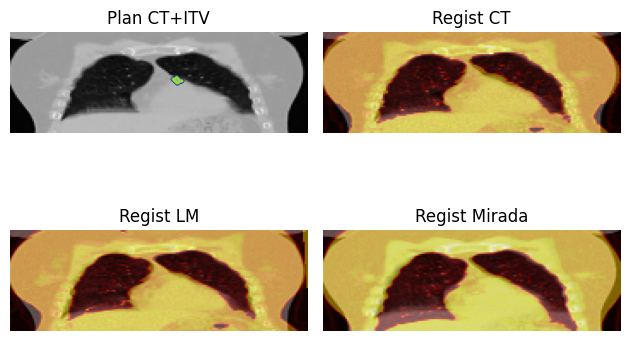

------------------------


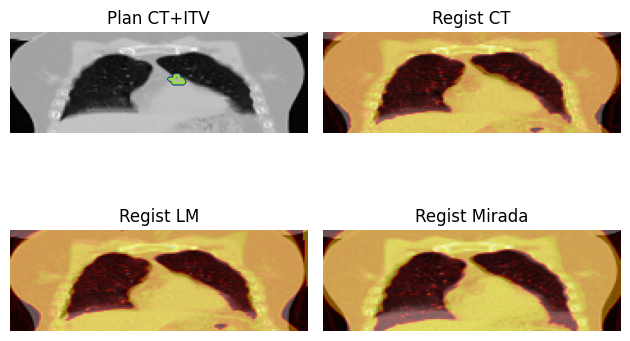

------------------------


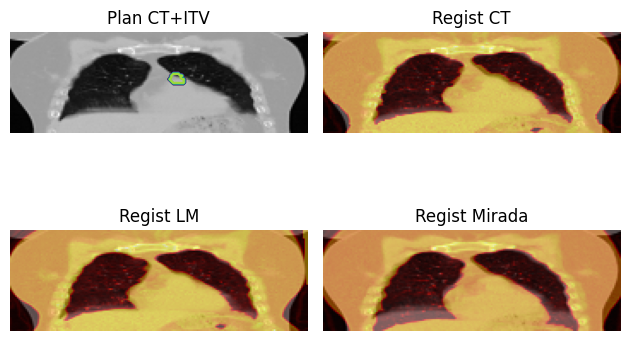

------------------------


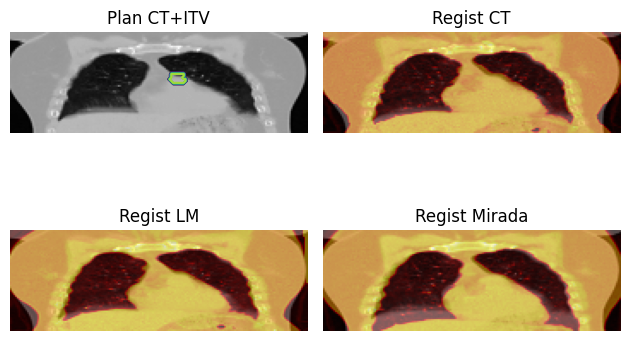

------------------------


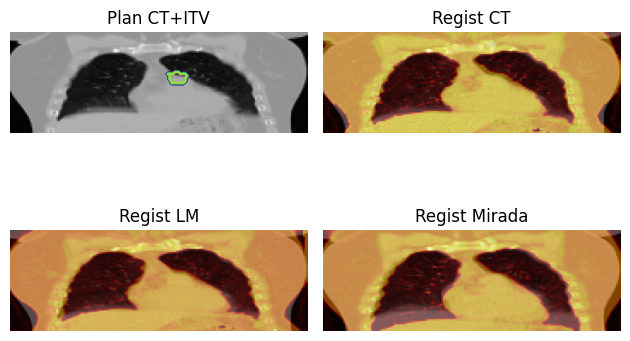

------------------------


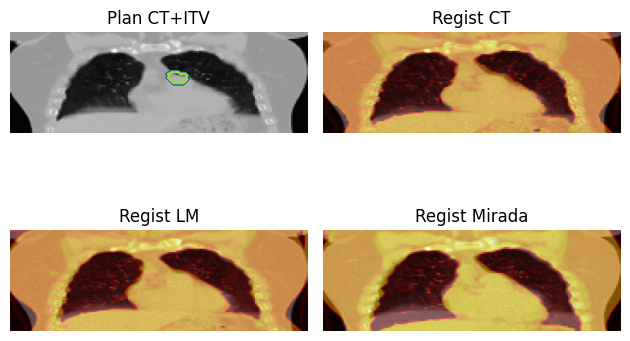

------------------------


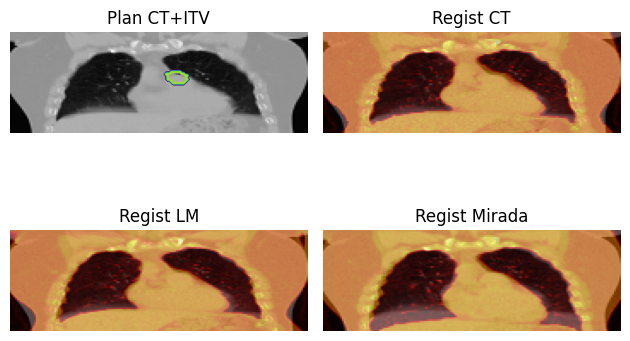

------------------------


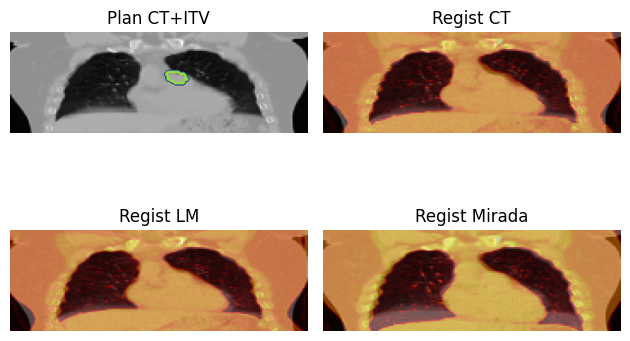

------------------------


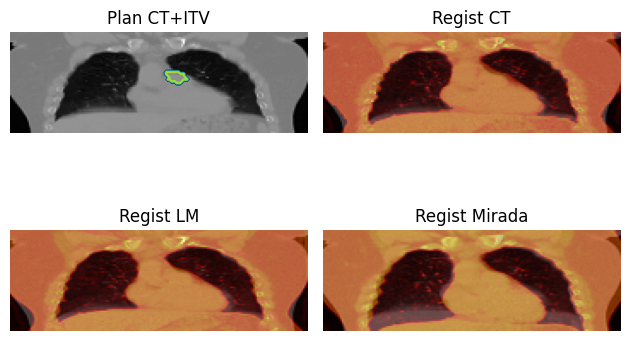

------------------------


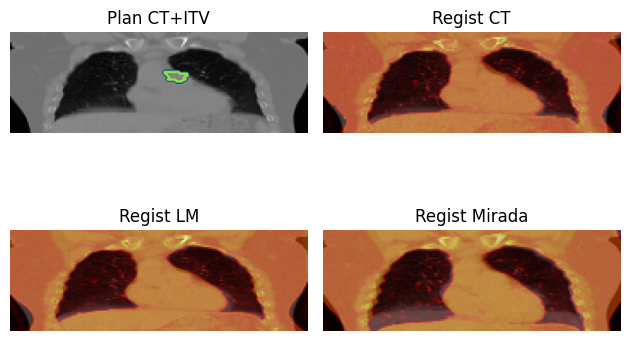

------------------------


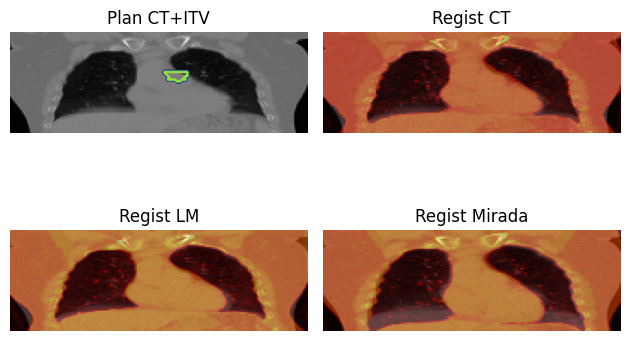

------------------------


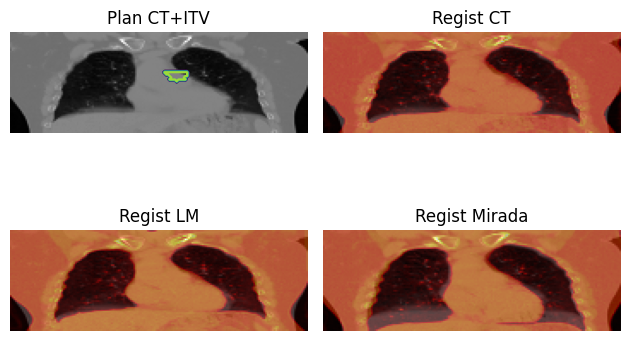

------------------------


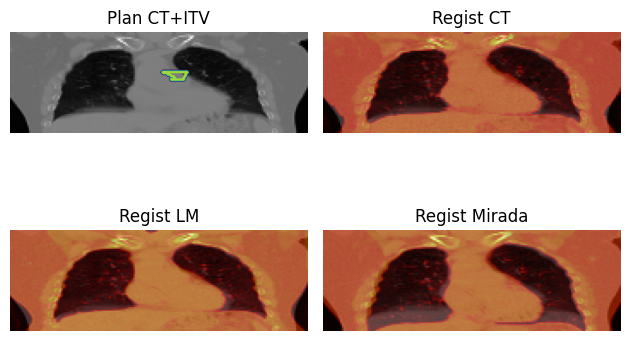

------------------------


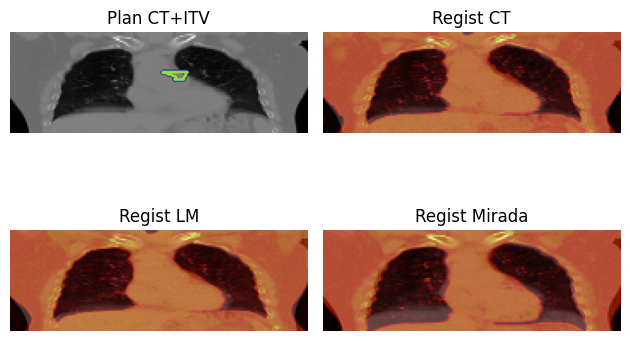

------------------------


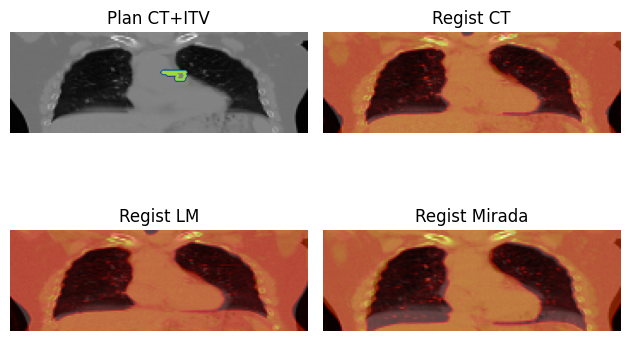

------------------------


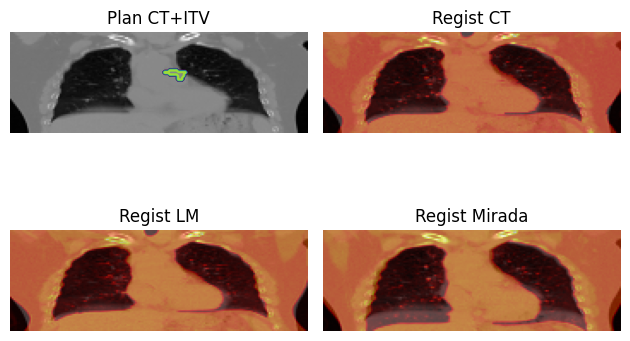

------------------------


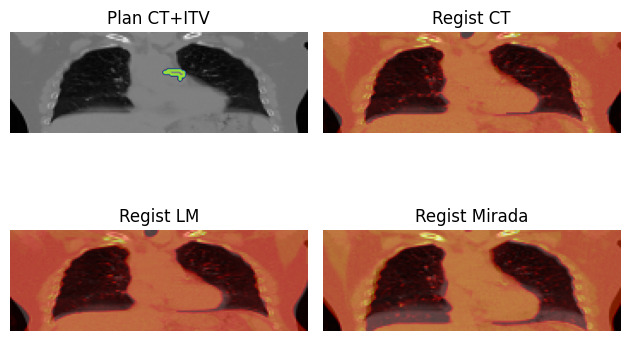

------------------------


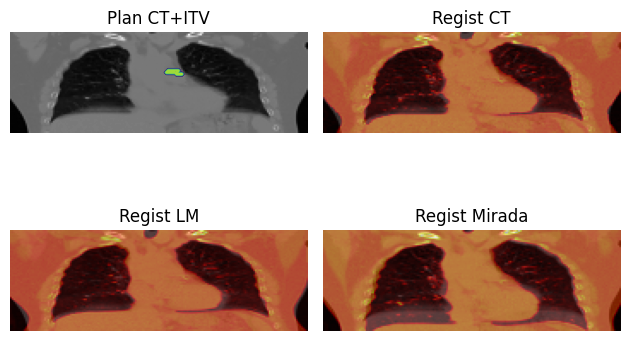

------------------------


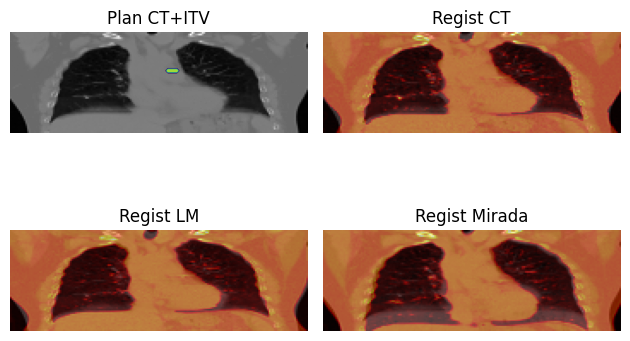

------------------------


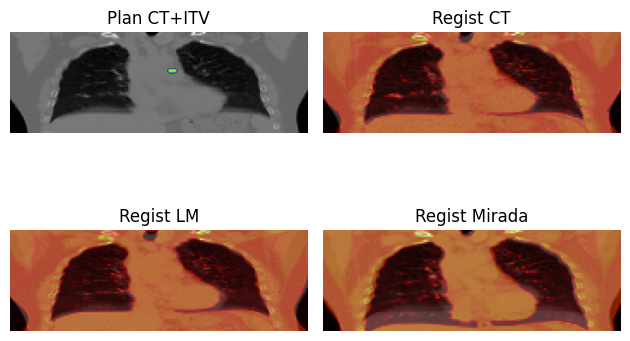

------------------------


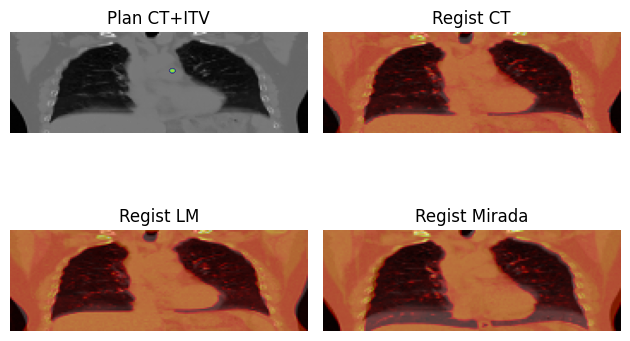

------------------------


In [13]:
alphaVal = .5

count = 0
for i in range(0,PlanCT_array.shape[-2],1):
    if np.sum(ITV_array[:, i, :]) > 0:
        plt.subplot(221), plt.imshow(PlanCT_array[:, i, :], cmap='gray'), plt.axis("off")
        plt.contour(ITV_array[:, i, :])
        plt.gca().invert_yaxis(), plt.title("Plan CT+ITV")
        
        plt.subplot(222), plt.imshow(PlanCT_array[:, i, :], cmap='gray'), plt.axis("off")
        plt.imshow(ACCTCT_array[:, i, :], cmap='hot', alpha=alphaVal, ), plt.axis("off")
        plt.gca().invert_yaxis(), plt.title("Regist CT")

        plt.subplot(223), plt.imshow(PlanCT_array[:, i, :], cmap='gray'), plt.axis("off")
        plt.imshow(ACCTLM_array[:, i, :], cmap='hot', alpha=alphaVal, ), plt.axis("off")
        plt.gca().invert_yaxis(), plt.title("Regist LM")

        plt.subplot(224), plt.imshow(PlanCT_array[:, i, :], cmap='gray'), plt.axis("off")
        plt.imshow(ACCTMirada_array[:, i, :], cmap='hot', alpha=alphaVal, ), plt.axis("off")
        plt.gca().invert_yaxis(), plt.title("Regist Mirada")

        plt.tight_layout()

        plt.show()
        print("------------------------")
        #plt.savefig(savePath + "BeforeAfterR_LC" + str(i) + ".jpeg")
        count += 1
        if count > 50:
            break